In [14]:
import numpy as np
import pandas as pd
import io
import requests
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


In [15]:
url="http://covidtracking.com/api/states/daily.csv"
s=requests.get(url).content

In [16]:
df = pd.read_csv(io.StringIO(s.decode('utf-8')))

In [17]:
df['date'] =  pd.to_datetime(df['date'], format='%Y%m%d')

In [18]:
df.drop(['dateChecked'],axis=1,inplace=True)

In [19]:
df['state']=df['state'].apply(str)

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 24 columns):
date                        3321 non-null datetime64[ns]
state                       3321 non-null object
positive                    3306 non-null float64
negative                    3140 non-null float64
pending                     677 non-null float64
hospitalizedCurrently       1191 non-null float64
hospitalizedCumulative      1239 non-null float64
inIcuCurrently              594 non-null float64
inIcuCumulative             232 non-null float64
onVentilatorCurrently       471 non-null float64
onVentilatorCumulative      72 non-null float64
recovered                   1037 non-null float64
hash                        3321 non-null object
death                       2594 non-null float64
hospitalized                1239 non-null float64
total                       3319 non-null float64
totalTestResults            3319 non-null float64
posNeg                      3319 non-null fl

In [21]:
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-05-03    AK     368.0   21210.0      NaN                   12.0   
1 2020-05-03    AL    7725.0   84775.0      NaN                    NaN   
2 2020-05-03    AR    3431.0   49459.0      NaN                  100.0   
3 2020-05-03    AS       0.0      57.0      NaN                    NaN   
4 2020-05-03    AZ    8640.0   72479.0      NaN                  732.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                     NaN             NaN              NaN   
1                  1035.0             NaN            403.0   
2                   427.0             NaN              NaN   
3                     NaN             NaN              NaN   
4                  1348.0           282.0              NaN   

   onVentilatorCurrently  ...  hospitalized    total totalTestResults  \
0                    NaN  ...           NaN  21578.0          21578.0   
1                    NaN  ...        1035.0  92500.0          92500.0   
2                   20.0  ...         427.0  52890.0          52890.0   
3                    NaN  ...           NaN     57.0             57.0   
4                  192.0  ...        1348.0  81119.0          81119.0   

    posNeg  fips  deathIncrease  hospitalizedIncrease  negativeIncrease  \
0  21578.0     2            0.0                   0.0             176.0   
1  92500.0     1            2.0                  12.0               0.0   
2  52890.0     5            3.0                  13.0            1249.0   
3     57.0    60            0.0                   0.0               0.0   
4  81119.0     4           14.0                   9.0            2846.0   

   positiveIncrease  totalTestResultsIncrease  
0               3.0                     179.0  
1             291.0                     291.0  
2              59.0                    1308.0  
3               0.0                       0.0  
4             276.0                    3122.0  

[5 rows x 24 columns]

In [22]:
df.fillna(value=-1, inplace=True)

In [23]:
df.head()

date state  positive  negative  pending  hospitalizedCurrently  \
0 2020-05-03    AK     368.0   21210.0     -1.0                   12.0   
1 2020-05-03    AL    7725.0   84775.0     -1.0                   -1.0   
2 2020-05-03    AR    3431.0   49459.0     -1.0                  100.0   
3 2020-05-03    AS       0.0      57.0     -1.0                   -1.0   
4 2020-05-03    AZ    8640.0   72479.0     -1.0                  732.0   

   hospitalizedCumulative  inIcuCurrently  inIcuCumulative  \
0                    -1.0            -1.0             -1.0   
1                  1035.0            -1.0            403.0   
2                   427.0            -1.0             -1.0   
3                    -1.0            -1.0             -1.0   
4                  1348.0           282.0             -1.0   

   onVentilatorCurrently  ...  hospitalized    total totalTestResults  \
0                   -1.0  ...          -1.0  21578.0          21578.0   
1                   -1.0  ...        1035.0  92500.0          92500.0   
2                   20.0  ...         427.0  52890.0          52890.0   
3                   -1.0  ...          -1.0     57.0             57.0   
4                  192.0  ...        1348.0  81119.0          81119.0   

    posNeg  fips  deathIncrease  hospitalizedIncrease  negativeIncrease  \
0  21578.0     2            0.0                   0.0             176.0   
1  92500.0     1            2.0                  12.0               0.0   
2  52890.0     5            3.0                  13.0            1249.0   
3     57.0    60            0.0                   0.0               0.0   
4  81119.0     4           14.0                   9.0            2846.0   

   positiveIncrease  totalTestResultsIncrease  
0               3.0                     179.0  
1             291.0                     291.0  
2              59.0                    1308.0  
3               0.0                       0.0  
4             276.0                    3122.0  

[5 rows x 24 columns]

In [24]:
def plot_var(var='positiveIncrease',
             state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(var)==str, "Expected string as the variable name"
    assert type(state)==str, "Expected string as the state name"
 
    y = df[df['state']==state][var]
    x = df[df['state']==state]['date']
    plt.figure(figsize=(12,4))
    plt.title("Plot of \"{}\" for {}".format(var,state),fontsize=18)
    plt.bar(x=x,height=y,edgecolor='k',color='orange')
    plt.grid(True)
    plt.xticks(fontsize=14,rotation=45)
    plt.yticks(fontsize=14)
    plt.show()

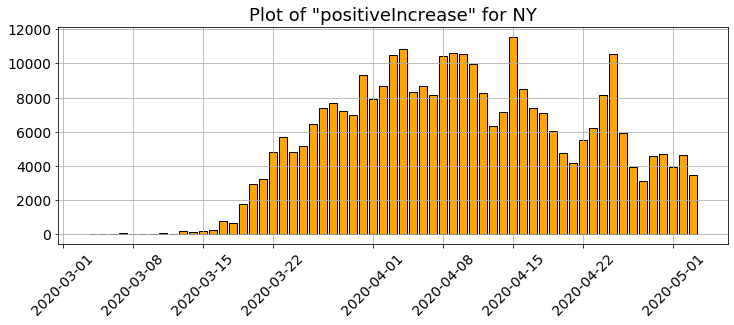

In [25]:
plot_var()

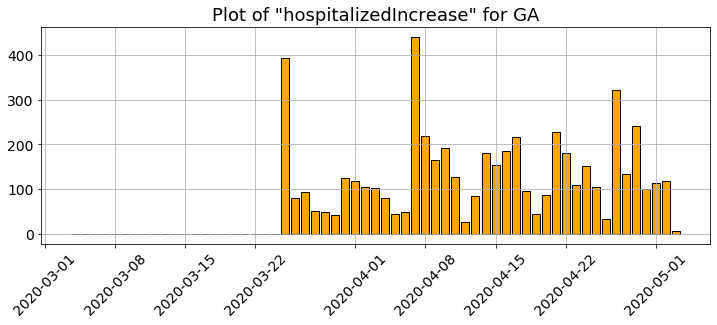

In [26]:
plot_var('hospitalizedIncrease','GA')

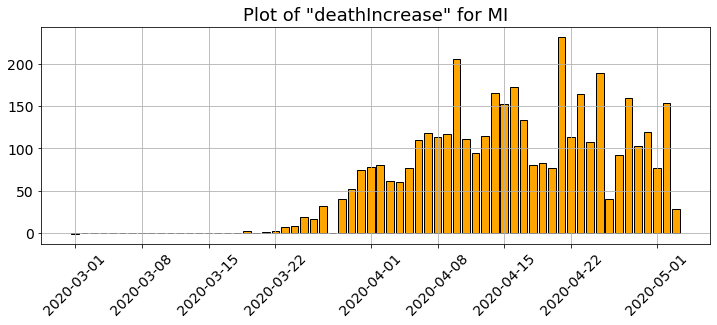

In [27]:
plot_var('deathIncrease','MI')

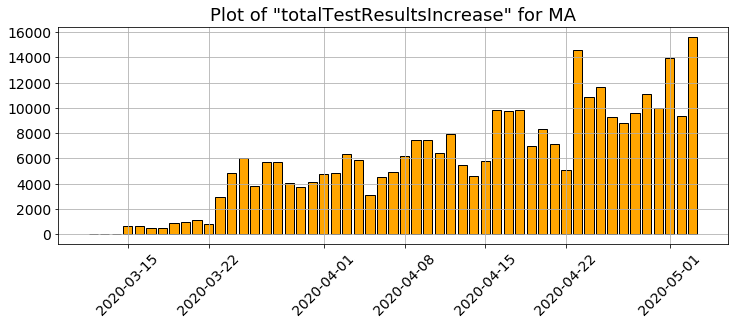

In [28]:
plot_var('totalTestResultsIncrease','MA')

In [29]:
def plot_xy(varx='totalTestResultsIncrease',
            vary='positiveIncrease',
            state='NY'):
    """
    Plots a bar chart of the given variable over the date range
    """
    assert type(varx)==str, "Expected string as the variable x name"
    assert type(vary)==str, "Expected string as the variable y name"
 
    y = df[df['state']==state][vary]
    x = df[df['state']==state][varx]
    if (x.nunique()!=1) and (y.nunique()!=1):
        plt.figure(figsize=(12,4))
        plt.title("Plot of \"{}\" vs. \"{}\" for {}".format(varx,vary,state),fontsize=18)
        plt.scatter(x=x,y=y,edgecolor='k',color='lightgreen',s=100)
        plt.grid(True)
        plt.xticks(fontsize=14,rotation=45)
        plt.yticks(fontsize=14)
        plt.show()
    else:
        print("Some of the data unavailable for a scatter plot. Sorry!")

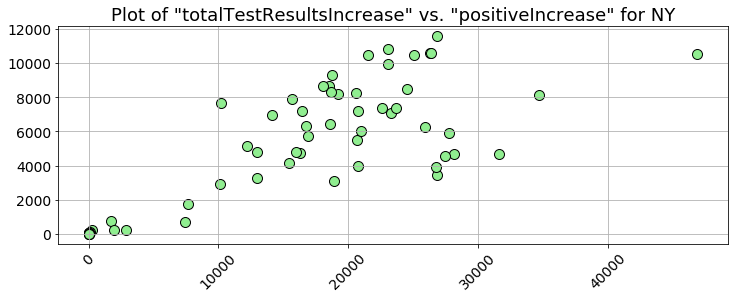

In [30]:
plot_xy(state='NY')

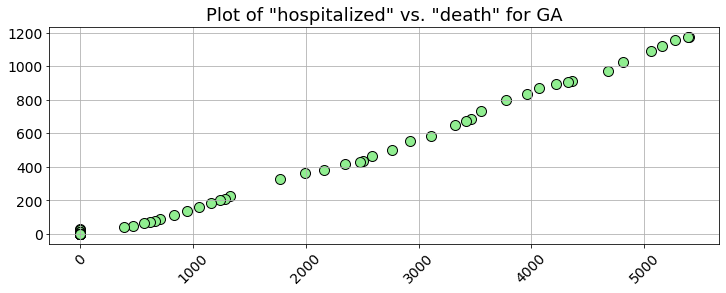

In [31]:
plot_xy('hospitalized','death','GA')

In [32]:
plot_xy('hospitalized','death','CA')

Some of the data unavailable for a scatter plot. Sorry!


In [33]:
def plotTesting(lst_states=['NY','CA','MA','TX','PA']):
    """
    Plots the cumulative testing done by the given list of states
    """
    legends = []
    plt.figure(figsize=(10,5))
    plt.title("Total test results",fontsize=18)
    for s in lst_states:
        data = np.array(df[df['state']==s]['totalTestResults'])[-1::-1]
        slope = int((data[-1]-data[0])/len(data))
        plt.plot(data,linewidth=2)
        plt.text(x=len(data)-2,y=data[-1]*1.05,s=s,fontsize=14)
        legends.append(str(slope)+" tests/day in " + s)
    plt.legend(legends,fontsize=14)
    plt.grid(True)
    plt.xlim(0,len(data)+2)
    plt.xticks(fontsize=16)
    plt.yticks(fontsize=16)
    plt.xlabel("Days",fontsize=16)
    plt.ylabel("Total test results",fontsize=16)
    plt.show()

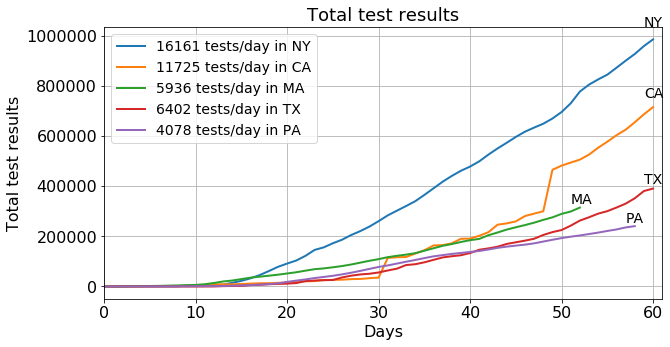

In [34]:
plotTesting()

In [35]:
def fatality_ratio(state='CA'):
    """
    Computes the fatality ratio for the given state
    Fatality ratio is the ratio of total dead to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        d = float(df[(df['state']==state) & (df['date']==date)]['death'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (d!=-1.0) and (p!=-1.0) and (p!=0):
        return round(d/p,3)
    else:
        return -1

In [36]:
def hospitalization_ratio(state='NY'):
    """
    Computes the hospitalization ratio for the given state
    Hospitalization ratio is the ratio of total hospitalized to total positive case
    """
    
    date = df.iloc[0]['date']
    try:
        h = float(df[(df['state']==state) & (df['date']==date)]['hospitalized'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
    
    if (h!=-1.0) and (p!=-1.0) and (p!=0):
        return round(h/p,3)
    else:
        return -1

In [37]:
def positiveTest_ratio(state='NY'):
    """
    Computes the test-positive ratio for the given state
    Test-positive ratio is the ratio of total positive cases to total number of tests
    """
    
    date = df.iloc[0]['date']
    try:
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
        t = float(df[(df['state']==state) & (df['date']==date)]['totalTestResults'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (p!=-1.0) and (t!=-1.0) and (t!=0):
        return round(p/t,3)
    else:
        return -1

In [38]:
def recovery_ratio(state='NY'):
    """
    Computes the recovery ratio for the given state
    Recovery ratio is the ratio of total recovered cases to total positive cases
    """
    
    date = df.iloc[0]['date']
    try:
        r = float(df[(df['state']==state) & (df['date']==date)]['recovered'])
        p = float(df[(df['state']==state) & (df['date']==date)]['positive'])
    except:
        print("Could not retrieve the necessary information")
        return -1
    
    if (r!=-1.0) and (p!=-1.0) and (p!=0):
        return round(r/p,3)
    else:
        return -1

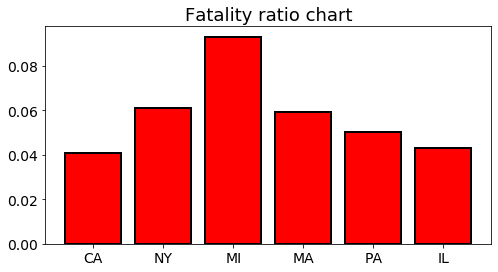

In [39]:
states = ['CA','NY','MI','MA','PA','IL']
fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)

plt.figure(figsize=(8,4))
plt.title("Fatality ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=fr,color='red',
        edgecolor='k',linewidth=2)
plt.show()

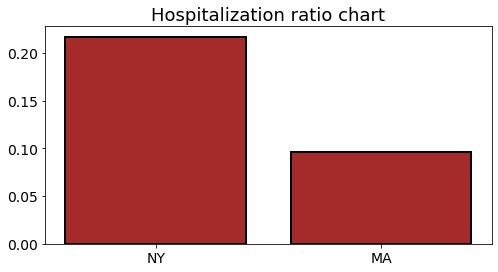

In [40]:
states = ['CA','NY','MI','MA','PA','IL']
hos,x = [],[]
for s in states:
    data = hospitalization_ratio(s)
    if data!=-1:
        hos.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Hospitalization ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=hos,color='brown',
        edgecolor='k',linewidth=2)
plt.show()


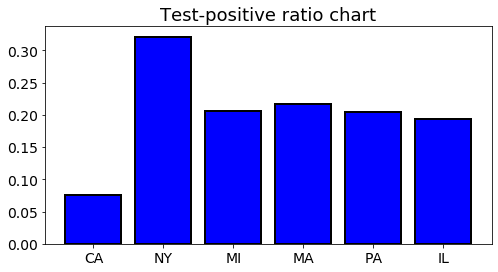

In [41]:
states = ['CA','NY','MI','MA','PA','IL']
tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
plt.figure(figsize=(8,4))
plt.title("Test-positive ratio chart",fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.bar(x=x,height=tp,color='blue',
        edgecolor='k',linewidth=2)
plt.show()

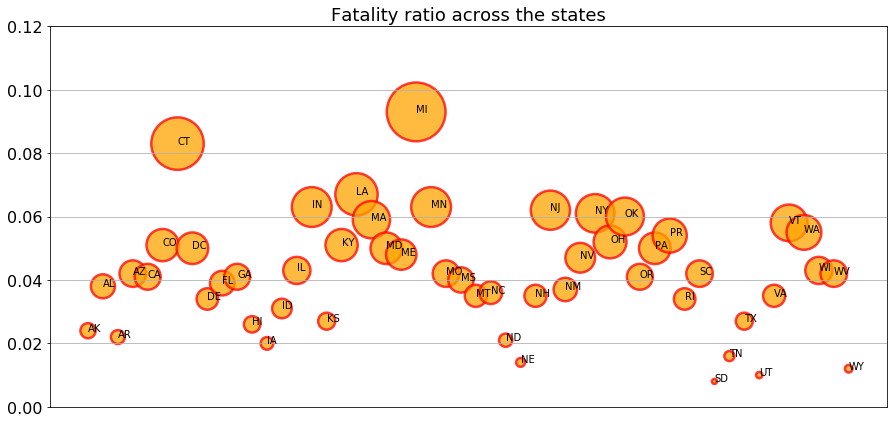

In [42]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

fr,x = [],[]
for s in states:
    data = fatality_ratio(s)
    if data!=-1:
        fr.append(data)
        x.append(s)
fr = np.array(fr)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Fatality ratio across the states",fontsize=18)
plt.scatter(x=x,y=fr,
            s=4e5*fr**2,
            color='orange',edgecolor='red',alpha=0.75,linewidth=2.5)
#plt.xticks(rotation=45,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],fr[i]))
plt.ylim(0,0.12)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()

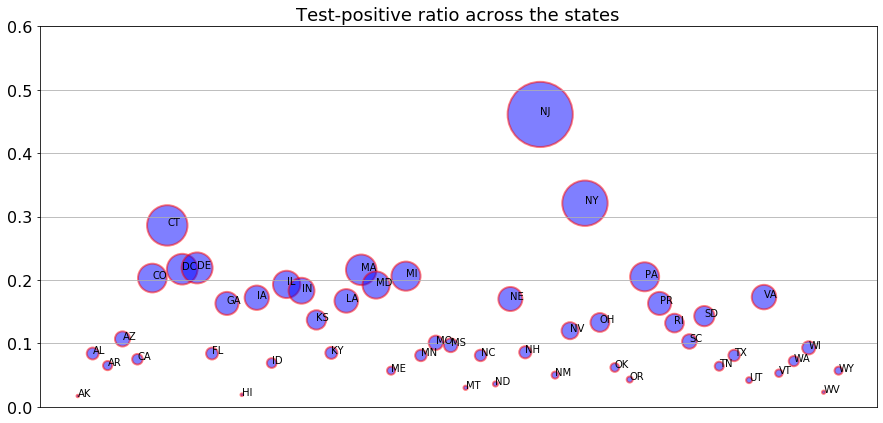

In [43]:
states = list(df['state'].unique())
for s in ['AS','GU','MP','PU','VI']:
    try:
        states.remove(s)
    except:
        pass

tp,x = [],[]
for s in states:
    data = positiveTest_ratio(s)
    if data!=-1:
        tp.append(data)
        x.append(s)
tp = np.array(tp)
plt.figure(figsize=(15,7))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)
plt.title("Test-positive ratio across the states",fontsize=18)
plt.scatter(x=x,y=tp,
            s=2e4*tp**2,
            color='blue',edgecolor='red',alpha=0.5,linewidth=2)
plt.xticks(rotation=90,fontsize=12)
for i,s in enumerate(x):
    plt.annotate(s=s,xy=(x[i],tp[i]))
plt.ylim(0,0.6)
plt.yticks(fontsize=16)
plt.grid(True,axis='y')
plt.show()


In [44]:
def caseCountsdecrease(days=14,state='NY'):
    """
    Determines whether the given state has a decreasing case counts for given number of days
    Arguments:
            days: Number of days to go back
            state: Name of the state (a string)
    Returns:
            A tuple containing the successive difference vector (of new cases) and
            the number of negative quantities in that vector. When all the quantities are negative,
            the state has shown consistent decrease in new cases for the given number of days.
    """
    positiveIncrease = np.array(df[df['state']==state]['positiveIncrease'][:days+1])[-1::-1]
    diff = np.diff(positiveIncrease)
    countofNeg = np.sum(diff <= 0, axis=0)
    return (countofNeg, diff)

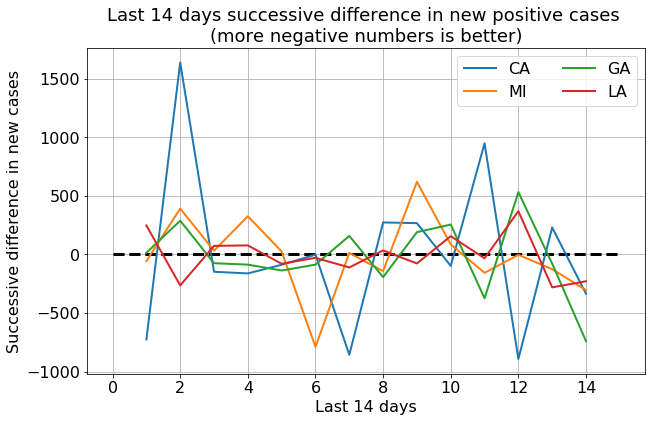

In [49]:
states = ['CA','MI','GA','LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

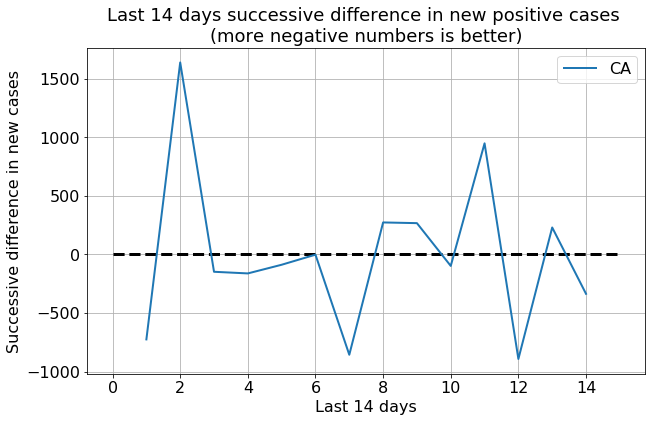

In [46]:
states = ['CA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()

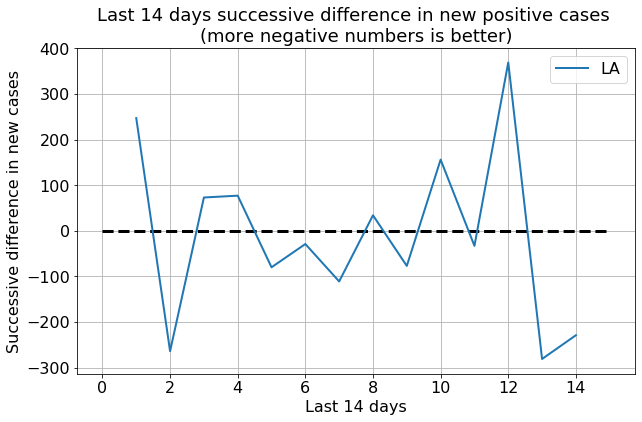

In [47]:
states = ['LA']
cd = []
x = np.arange(1,15,1)
plt.figure(figsize=(10,6))
plt.title("Last 14 days successive difference in new positive cases \n(more negative numbers is better)",
          fontsize=18)
for s in states:
    _,data = caseCountsdecrease(days=14,state=s)
    plt.plot(x,data,linewidth=2)
plt.legend(states,fontsize=16,ncol=2)
plt.grid(True)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel("Last 14 days",fontsize=16)
plt.ylabel("Successive difference in new cases",fontsize=16)
plt.hlines(y=0,xmin=0,xmax=15,linestyles='--',lw=3)
plt.show()